In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.dates import MonthLocator, DateFormatter
import folium
from folium.plugins import HeatMap

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

PatientInfo_kt = pd.read_csv(r'C:\Users\82106\Desktop\수업\워밍업프로젝트\1주차코로나시각화\KT_data_20200717\COVID_19\PatientInfo_20200717.csv')
PatientRoute = pd.read_csv(r'C:\Users\82106\Desktop\수업\워밍업프로젝트\1주차코로나시각화\coronavirusdataset_20200601\PatientRoute.csv')
naver_corona_like = pd.read_csv(r'C:\Users\82106\Desktop\수업\워밍업프로젝트\1주차코로나시각화\naver_corona_like.csv')

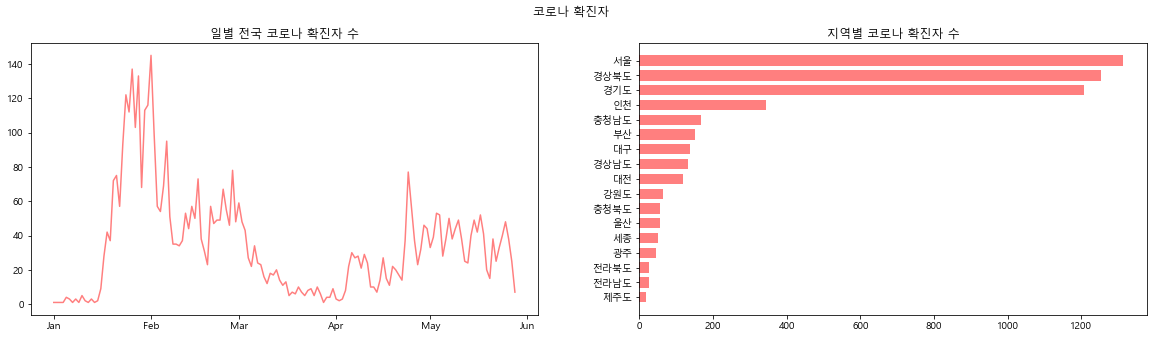

In [2]:
value_count_confirm = PatientInfo_kt['confirmed_date'].value_counts(bins=None)
sort_index_confirm = value_count_confirm.sort_index()

x1 = sort_index_confirm.index
y1 = sort_index_confirm.values

PiPro = PatientInfo_kt['province'].value_counts(bins=None)
PiPro_sort = PiPro.sort_values()

x2 = PiPro_sort.index
y2 = PiPro_sort.values

plt.figure(figsize=(20,5))


ax = plt.subplot(1, 2, 1)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.plot(x1, y1,color='red',alpha=0.5)
plt.title('일별 전국 코로나 확진자 수')

plt.subplot(1, 2, 2)
plt.barh(x2,y2,color='red',alpha=0.5,height=0.7,align='center')
plt.title('지역별 코로나 확진자 수')

plt.suptitle('코로나 확진자')
plt.show()

In [3]:
PatientRoute_data = PatientRoute.loc[:,['latitude','longitude']]

lat = []
lon = []
for i in range(len(PatientRoute_data)):
    lat.append(PatientRoute_data['latitude'][i])
    lon.append(PatientRoute_data['longitude'][i])

In [4]:
def patient_route_seoul():
    m = folium.Map(location=(37.5665, 126.9780), zoom_start=11)
    
    heatMap = HeatMap(zip(lat, lon),
                   min_opacity=0.1,
                   max_val=10,
                   radius=12, blur=13,
                   max_zoom=5,color='red')

    m.add_child(heatMap)
    
    return m
patient_route_seoul()

In [5]:
def patient_route_busan():
    m = folium.Map(location=(35.1796, 129.0756), zoom_start=12)
    
    heatMap = HeatMap(zip(lat, lon),
                   min_opacity=0.1,
                   max_val=10,
                   radius=14, blur=13,
                   max_zoom=5,color='red')

    m.add_child(heatMap)
    
    return m
patient_route_busan()

In [6]:
def patient_route_korea():
    m = folium.Map(location=(35.9078, 127.7669), zoom_start=7)
    
    heatMap = HeatMap(zip(lat, lon),
                   min_opacity=0.1,
                   max_val=10,
                   radius=10, blur=13,
                   max_zoom=5,color='red')

    m.add_child(heatMap)
    
    return m
patient_route_korea()

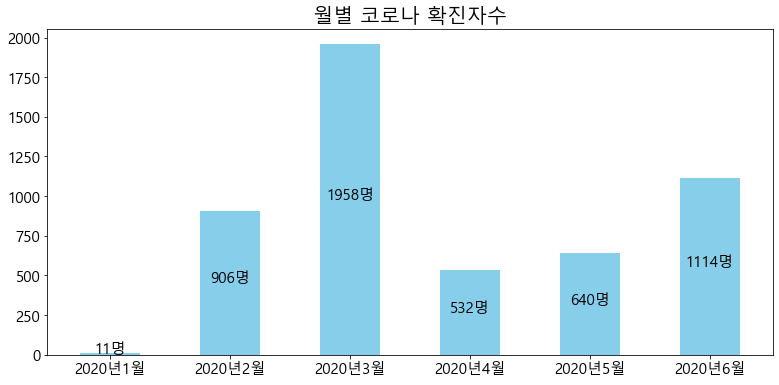

In [7]:
covid_infected = PatientInfo_kt['confirmed_date'].value_counts(bins=None)
covid = covid_infected.sort_index()

jan_values = sum(covid.values[:6])
feb_values = sum(covid.values[6:27])
mar_values = sum(covid.values[27:58])
apr_values = sum(covid.values[58:88])
may_values = sum(covid.values[88:118])
jun_values = sum(covid.values[118:])

covid_month = ['2020년1월','2020년2월','2020년3월','2020년4월','2020년5월','2020년6월']
covid_month_values = [jan_values,feb_values,mar_values,apr_values,may_values,jun_values]

fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot()

rects = plt.bar(covid_month, covid_month_values, align='center', width=0.5, color='skyblue')

for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2, 0.5 * rect.get_height(), str(covid_month_values[i]) + '명',ha='center',fontsize=15)

plt.title('월별 코로나 확진자수',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

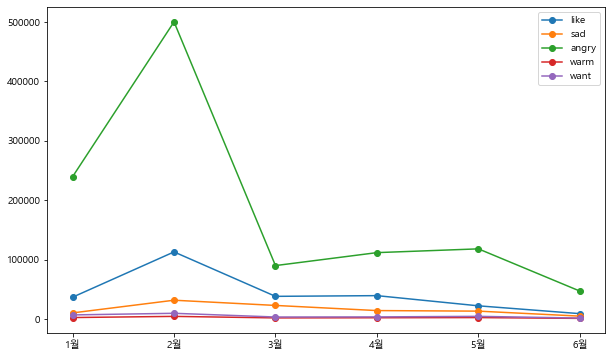

In [8]:
month = naver_corona_like['Unnamed: 0'].values
like = naver_corona_like['좋아요'].values
sad = naver_corona_like['슬퍼요'].values
angry = naver_corona_like['화나요'].values
warm = naver_corona_like['훈훈해요'].values
want = naver_corona_like['후속기사원해요'].values

plt.figure(figsize=(10,6))

plt.plot(month,like,marker='o',label="like")
plt.plot(month,sad,marker='o',label="sad")
plt.plot(month,angry,marker='o',label="angry")
plt.plot(month,warm,marker='o',label="warm")
plt.plot(month,want,marker='o',label="want")

plt.legend()
plt.show()